In [325]:
# Load packages
import os
import csv
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import geopandas

In [326]:
# File paths
data_path_home_value = "../Work_David/Data/home_value_interpolated.csv"
data_path_median_income = "../Work_David/Data/median_income_formatted.csv"
data_path_states = "../Work_David/Data/states.csv"

In [327]:
# Function to save figures with numeric-encoded filenames
figure_count = 0

def save_figure(fig_count, filename):
    fig_count = fig_count + 1
    figure_code = f"d{fig_count:02d}_"
    full_path = f"../Images/{figure_code}{filename}"
    print(f"Saving to: {full_path}")
    plt.savefig(full_path)
    return fig_count

In [328]:
# Read home value data
home_value_df = pd.read_csv(data_path_home_value, index_col=0)
home_value_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Interpolated
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,161415.797093,112468.897763,187235.313336,166981.743111,101330.145359,320965.660495,222891.848203,240366.466568,...,122685.992092,120843.533394,180548.766033,159287.338362,177558.177299,212860.778161,86900.603167,150926.440573,154013.426255,NaN
2004-02,2004,2,162463.870016,112725.088423,187841.549097,167847.418906,101783.232071,325732.847350,223182.101684,242095.673819,...,123007.298345,121661.051633,180839.208311,160645.635537,179308.464022,214128.636011,87419.094513,151705.824485,154493.152088,NaN
2004-03,2004,3,163620.161222,113012.039266,188271.790840,168900.513316,102304.179582,331170.356031,223520.345262,243749.324603,...,123363.249017,122955.182386,181171.778189,162105.970945,181345.555866,215461.768858,88034.036663,152507.819145,155126.857142,NaN
2004-04,2004,4,164912.797589,113305.182222,189382.536002,170180.251404,102880.788798,337412.489527,224019.582683,245757.604398,...,123763.276144,124239.434257,181569.731315,163691.500174,183784.251765,217005.863589,88581.017025,153457.607735,155979.327633,NaN
2004-05,2004,5,166368.365614,113666.681304,190588.147633,171738.808920,103421.568193,344599.782061,224670.441514,248250.261007,...,124167.724328,125300.686962,181787.254249,165682.582390,186704.735618,218988.123794,89089.913281,154662.247862,157153.052502,NaN


In [329]:
# Read median income data
median_income_df = pd.read_csv(data_path_median_income, index_col=0)
median_income_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005-01,2005,1,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006-01,2006,1,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007-01,2007,1,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008-01,2008,1,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [330]:
# Read state data
states_df = pd.read_csv(data_path_states, index_col=0)
states_df.head()

,Code,Lat,Lon
State,,,
Alabama,AL,32.806671,-86.791130
Alaska,AK,61.370716,-152.404419
Arizona,AZ,33.729759,-111.431221
Arkansas,AR,34.969704,-92.373123
California,CA,36.116203,-119.681564


In [331]:
# List home_value_df columns, numbered for reference
hv_list = home_value_df.columns.to_list()
hv_colnum = range(0, len(hv_list))
hv_column_pair = pd.DataFrame(zip(hv_colnum, hv_list))


In [332]:
# List median_income_df columns, numbered for reference
inc_list = median_income_df.columns.to_list()
inc_colnum = range(0, len(inc_list))
inc_column_pair = pd.DataFrame(zip(inc_colnum, inc_list))

In [333]:
# Variables to define to start and end columns for easy reference
start_column = hv_column_pair[hv_column_pair == 'Alabama'].first_valid_index()
end_column = hv_column_pair[hv_column_pair == 'Wyoming'].first_valid_index() + 1
print(f"Start Column = {start_column}\nEnd Column = {end_column}")

Start Column = 3
End Column = 54


In [334]:
# Calculate the means of median home value over the time range
median_home_value_means_df = home_value_df.iloc[:,start_column:end_column].mean()

# Get the top and bottom 5
median_home_value_means_top_5_df = median_home_value_means_df.sort_values(ascending=False)[0:5]
median_home_value_means_top_5_list = median_home_value_means_top_5_df.index
print(median_home_value_means_top_5_list)

median_home_value_means_bottom_5_df = median_home_value_means_df.sort_values(ascending=True)[0:5]
median_home_value_means_bottom_5_df = median_home_value_means_bottom_5_df.sort_values(ascending=False)
median_home_value_means_bottom_5_list = median_home_value_means_bottom_5_df.index
print(median_home_value_means_bottom_5_list)

Index(['Hawaii', 'District of Columbia', 'California', 'Massachusetts',
       'New Jersey'],
      dtype='object')
Index(['Arkansas', 'Mississippi', 'Oklahoma', 'Kentucky', 'West Virginia'], dtype='object')


Saving to: ../Images/d01_Home_Values_Top_Bottom_2004-2023.png


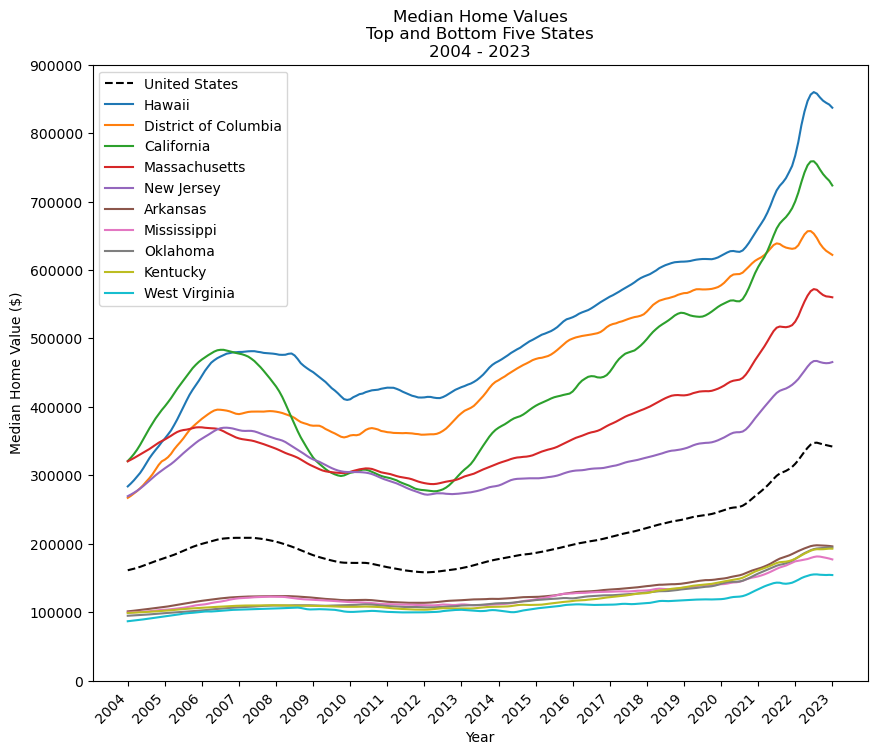

In [335]:
graph_list_hv = median_home_value_means_top_5_list.append(median_home_value_means_bottom_5_list)

plt.figure(figsize=(10,8))
plt.plot(home_value_df.loc[:,"United States"], 'k--', label="United States")
plt.plot(home_value_df.loc[:,graph_list_hv], label=graph_list_hv)
fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.legend()
plt.title(f"Median Home Values\nTop and Bottom Five States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 900000)

figure_count = save_figure(figure_count, "Home_Values_Top_Bottom_2004-2023.png")
plt.show();

In [336]:
# Calculate the net change in overall median home value

home_value_us_2004 = home_value_df.iloc[0:1,2].max()
home_value_us_2023 = home_value_df.iloc[-1:,2].max()
print(home_value_us_2023 - home_value_us_2004)

180759.45341639084


In [337]:
# Calculate the differences between the highest and lowest home values, and the net change from 2004 to 2023

min_2004 = home_value_df.iloc[0:1,start_column:end_column].min().min()
max_2004 = home_value_df.iloc[0:1,start_column:end_column].max().max()


min_2023 = home_value_df.iloc[-1:,start_column:end_column].min().min()
max_2023 = home_value_df.iloc[-1:,start_column:end_column].max().max()

difference_2004 = max_2004 - min_2004
difference_2023 = max_2023 - min_2023

net_change = difference_2023 - difference_2004
print(f"Net change: {net_change}")

pct_change = difference_2023 / difference_2004
print(f"Percentage: {pct_change * 100}")

Net change: 448730.6658712639
Percentage: 291.71194154019037


In [338]:
# Calculate the percent change in overall US median home value

us_median_hv_2004 = home_value_df.iloc[0:1,2].max()
us_median_hv_2023 = home_value_df.iloc[-1:,2].max()

difference_us = us_median_hv_2023 - us_median_hv_2004

pct_change_us = us_median_hv_2023 / us_median_hv_2004

print(f"US Median 2004: {us_median_hv_2004}")
print(f"US Median 2023: {us_median_hv_2023}")

print(f"Net change: {difference_us}")
print(f"Percentage: {pct_change_us * 100}")


US Median 2004: 161415.79709307026
US Median 2023: 342175.2505094611
Net change: 180759.45341639084
Percentage: 211.9837442627547


In [339]:
def graph_home_value_vs_income(states):
    line_style_mhv = ['m-', 'c-', 'r-', 'b-']
    line_style_mhi = ['m--', 'c--', 'r--', 'b--']
    state_list = ""

    for i in range(len(states)):
        fig01, = plt.plot(home_value_df.loc[:,states[i]], line_style_mhv[i], label=f"{states[i]} Home Value")
        fig02, = plt.plot(median_income_df.loc[:,states[i]], line_style_mhi[i], label=f"{states[i]} Income")
        state_list += f"{states[i]}"
        if i < (len(states) - 2):
            state_list += ", "
        elif i < (len(states) - 1):
            state_list += " & "
    fig_xticks = range(0, len(home_value_df), 12)
    fig_labels = home_value_df['Year'][::12]
    plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
    plt.title(f"Median Home Value and Median Household Income\n{state_list}\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
    plt.ylim((0, 900000))
    plt.xlabel("Year")
    plt.ylabel("U.S. Dollars ($)")
    plt.legend()

In [340]:
# Function to create Linear Regression plots
def LinRegressPlot(x_vals, y_vals, txt_loc_tuple, txt_size=16, marker_color='#0485d1', labels=["","",""]):
    plt.scatter(x_vals, y_vals, marker='o', color=marker_color, alpha=1, edgecolors='black')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)
    
    r_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_vals = (slope * x_vals) + intercept
    plt.plot(x_vals, r_vals, 'r')
    plt.annotate(r_line, txt_loc_tuple, color='r', size=txt_size)
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    
    return rvalue**2

Saving to: ../Images/d02_LinearRegression_Home_Values_Income.png


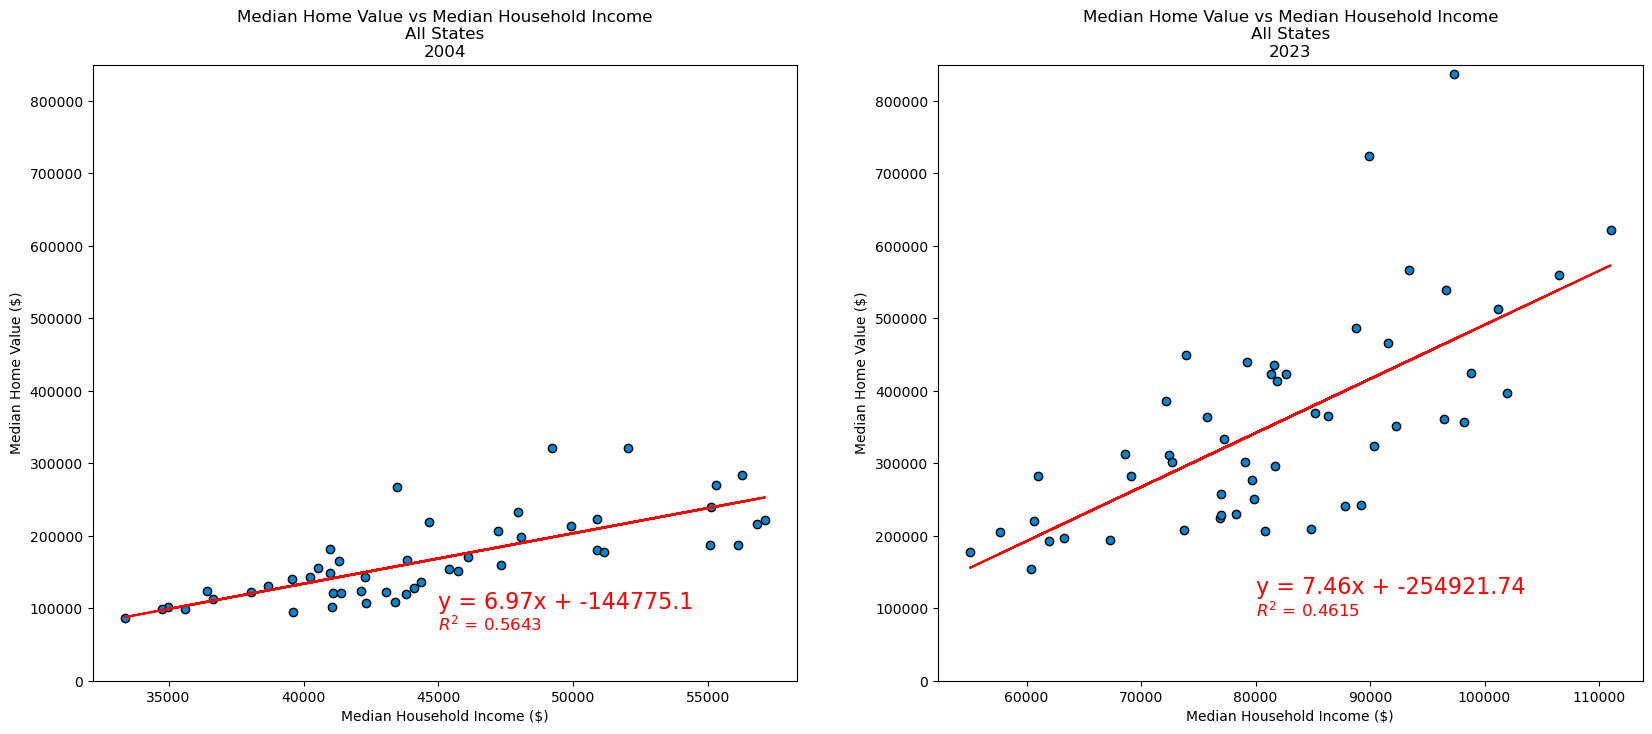

In [341]:
# Linear Regression plots for Home Value vs Household Income, 2004 and 2023

labels = [f"Median Home Value vs Median Household Income\nAll States\n{home_value_df.iloc[0,0]}",
          "Median Household Income ($)",
          "Median Home Value ($)"]

plt.figure(figsize=(20,8))

# Plot 2004 data
plt.subplot(1,2,1)
x_vals = median_income_df.iloc[0:1,start_column:end_column]
y_vals = home_value_df.iloc[0:1,start_column:end_column]

# Drop NA's
drop_list = y_vals.columns[y_vals.isna().any()]
x_vals = x_vals.drop(drop_list, axis=1)
y_vals = y_vals.drop(drop_list, axis=1)

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (45000,100000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (45000, 70000), color='r', size=12)

plt.ylim(0, 850000)

# Plot 2023 data
plt.subplot(1,2,2)
labels = [f"Median Home Value vs Median Household Income\nAll States\n{home_value_df.iloc[-1,0]}",
          "Median Household Income ($)",
          "Median Home Value ($)"]

x_vals = median_income_df.iloc[-1:,start_column:end_column]
y_vals = home_value_df.iloc[-1:,start_column:end_column]

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (80000,120000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (80000, 90000), color='r', size=12)

plt.ylim(0, 850000)

figure_count = save_figure(figure_count, "LinearRegression_Home_Values_Income.png")
plt.show();

In [342]:
# Calculate home value to income ratios for 2004

home_value_income_ratio_2004 = pd.DataFrame()
home_value_income_ratio_2004.index = inc_column_pair[start_column:end_column][1]
home_value_income_ratio_2004.index.name = "State"
home_value_income_ratio_2004['Median Income'] = median_income_df.iloc[0:1,start_column:end_column].squeeze()
home_value_income_ratio_2004['Median Home Value'] = round(home_value_df.iloc[0:1,start_column:end_column].squeeze(),0)
home_value_income_ratio_2004['Ratio'] = home_value_income_ratio_2004['Median Income'] / home_value_income_ratio_2004['Median Home Value']
home_value_income_ratio_2004 = states_df.merge(home_value_income_ratio_2004, on="State")

home_value_income_ratio_2004 = home_value_income_ratio_2004.rename({"District of Columbia": "D.C."})
ratio_top_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2004 = ratio_bottom_5_2004.sort_values("Ratio", ascending=False)

Saving to: ../Images/d03_Home_Affordability_Top_Bottom_2004.png


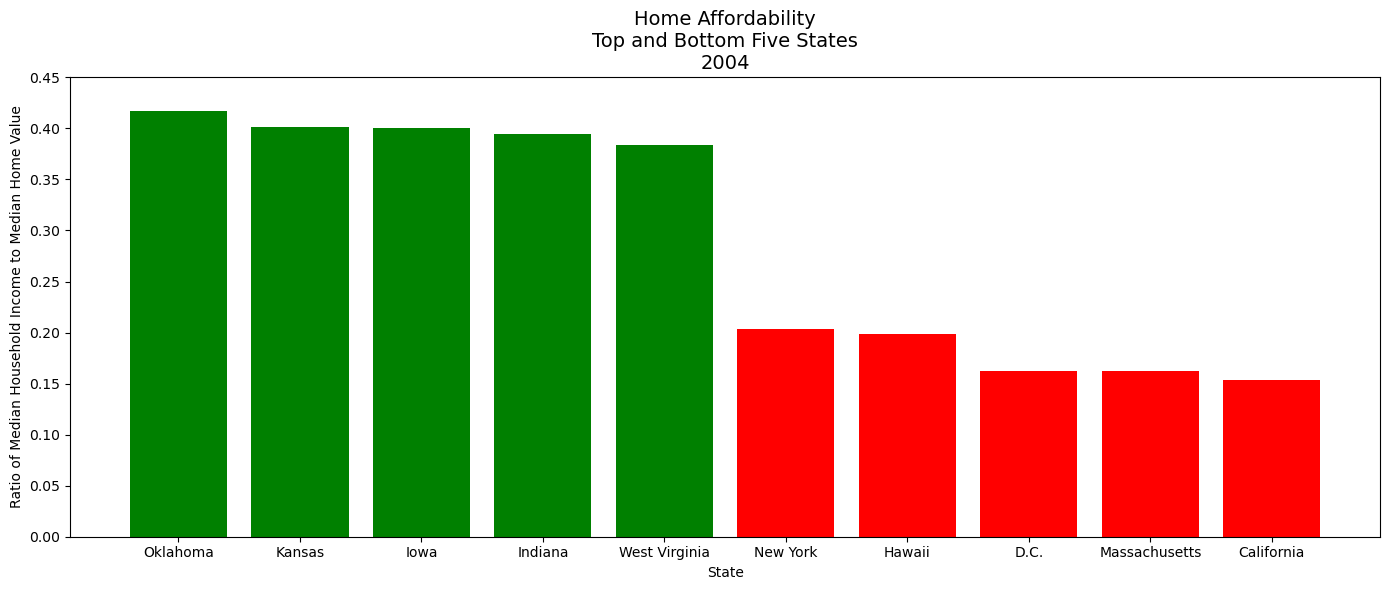

In [343]:
plt.figure(figsize=(14,6))
plt.bar(ratio_top_5_2004.index, ratio_top_5_2004['Ratio'], color='green')
plt.bar(ratio_bottom_5_2004.index, ratio_bottom_5_2004['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nTop and Bottom Five States\n{median_income_df.iloc[0:1,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Household Income to Median Home Value")
plt.tight_layout()
figure_count = save_figure(figure_count, "Home_Affordability_Top_Bottom_2004.png")
plt.show();

In [344]:
# Calculate home value to income ratios for 2023

home_value_income_ratio_2023 = pd.DataFrame()
home_value_income_ratio_2023.index = inc_column_pair[start_column:end_column][1]
home_value_income_ratio_2023.index.name = "State"
home_value_income_ratio_2023['Median Income'] = median_income_df.iloc[-1:,start_column:end_column].squeeze()
home_value_income_ratio_2023['Median Home Value'] = round(home_value_df.iloc[-1:,start_column:end_column].squeeze(),0)
home_value_income_ratio_2023['Ratio'] = home_value_income_ratio_2023['Median Income'] / home_value_income_ratio_2023['Median Home Value']
home_value_income_ratio_2023 = states_df.merge(home_value_income_ratio_2023, on="State")

home_value_income_ratio_2023 = home_value_income_ratio_2023.rename({"District of Columbia": "D.C."})
ratio_top_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2023 = ratio_bottom_5_2023.sort_values("Ratio", ascending=False)

home_value_income_ratio_2023.head()


,Code,Lat,Lon,Median Income,Median Home Value,Ratio
State,,,,,,
Alabama,AL,32.806671,-86.791130,60660.0,220040.0,0.275677
Alaska,AK,61.370716,-152.404419,98190.0,356353.0,0.275541
Arizona,AZ,33.729759,-111.431221,82660.0,423639.0,0.195119
Arkansas,AR,34.969704,-92.373123,63250.0,196303.0,0.322206
California,CA,36.116203,-119.681564,89870.0,723543.0,0.124208


Saving to: ../Images/d04_Home_Affordability_Top_Bottom_2023.png


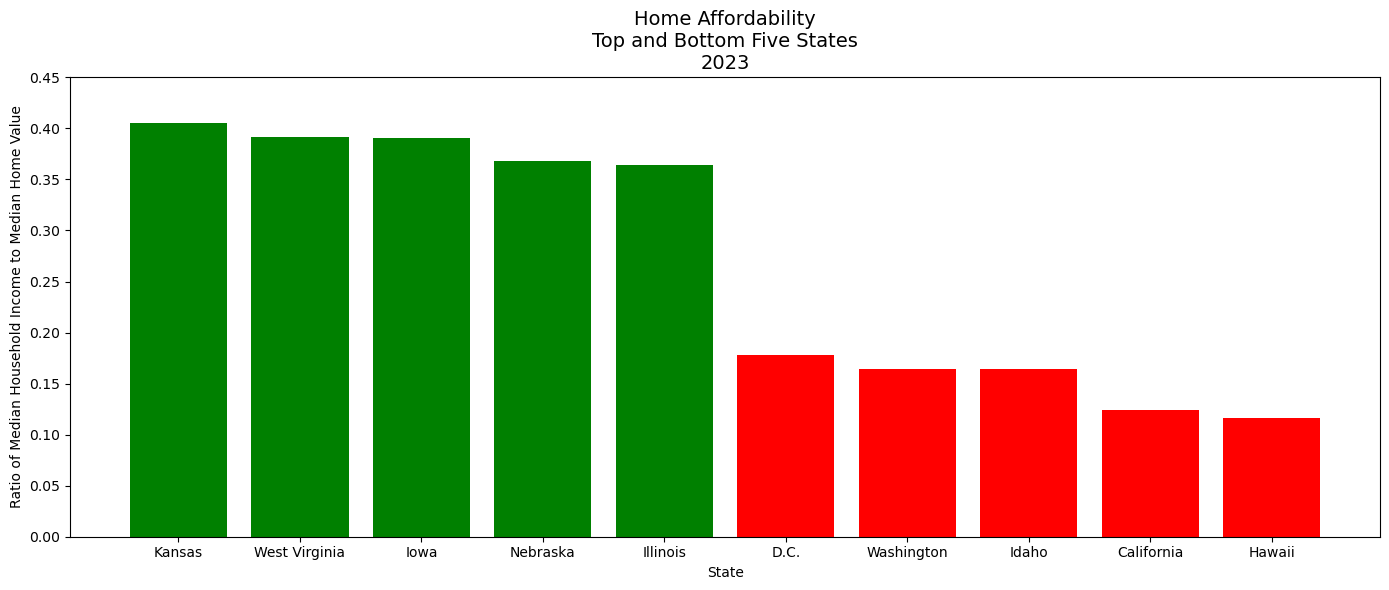

In [345]:
plt.figure(figsize=(14,6))
plt.bar(ratio_top_5_2023.index, ratio_top_5_2023['Ratio'], color='green')
plt.bar(ratio_bottom_5_2023.index, ratio_bottom_5_2023['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nTop and Bottom Five States\n{median_income_df.iloc[-1:,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Household Income to Median Home Value")
plt.tight_layout()

figure_count = save_figure(figure_count, "Home_Affordability_Top_Bottom_2023.png")
plt.show();

In [346]:
# Read Shapefile data
shapefile_shape_path = "../Work_David/Data/tl_2024_us_state/tl_2024_us_state.shp"
state_shape = geopandas.read_file(shapefile_shape_path)

# Change map projection
state_shape = state_shape.to_crs("EPSG:3395")

In [347]:
# Rename STUSPS column for merging
state_shape = state_shape.rename(columns={"STUSPS": "Code"})

# 2004 data
home_value_income_map_2004 = home_value_income_ratio_2004.reset_index()

# Remove Virgin Islands, Northern Mariana Islands, Guam, American Samoa, & Puerto Rico as they are not in the home value or income data sets
not_mapped = ["VI", "MP", "GU", "AS", "PR"]
for unmap in not_mapped:
    state_shape_2004 = state_shape[state_shape["Code"] != unmap]

# Merge home value and income data with shape data
state_shape_2004 = state_shape_2004.merge(home_value_income_map_2004, on="Code", how="outer")

# 2023 data
home_value_income_map_2023 = home_value_income_ratio_2023.reset_index()

# Remove Virgin Islands, Northern Mariana Islands, Guam, American Samoa, & Puerto Rico as they are not in the home value or income data sets
not_mapped = ["VI", "MP", "GU", "AS", "PR"]
for unmap in not_mapped:
    state_shape_2023 = state_shape[state_shape["Code"] != unmap]

# Merge home value and income data with shape data
state_shape_2023 = state_shape.merge(home_value_income_map_2023, on="Code", how="outer")

In [348]:
# Calculate the percent change in affordability
ratios_df = pd.DataFrame({"Code": home_value_income_ratio_2004['Code'], 
                                 "Ratio 2004": home_value_income_ratio_2004['Ratio'],
                                 "Ratio 2023": home_value_income_ratio_2023['Ratio'],
                                 'Percent Change': ((home_value_income_ratio_2023['Ratio'] / home_value_income_ratio_2004['Ratio']) * 100) - 100})
ratios_df.sort_values('Percent Change', ascending=False)


,Code,Ratio 2004,Ratio 2023,Percent Change
State,,,,
Illinois,IL,0.270585,0.363933,34.498918
Massachusetts,MA,0.162284,0.190111,17.147625
Connecticut,CT,0.229234,0.262496,14.510133
Michigan,MI,0.296252,0.336726,13.662047
D.C.,DC,0.162631,0.178409,9.702194
West Virginia,WV,0.384000,0.391284,1.896918
Ohio,OH,0.349931,0.353732,1.086215
Kansas,KS,0.401458,0.405131,0.914838
Nebraska,NE,0.367418,0.367804,0.105128


In [349]:
print(f"# of states with increased affordability = {len(ratios_df[ratios_df['Percent Change'] >= 0])}")
print(f"# of states with decreased affordability = {len(ratios_df[ratios_df['Percent Change'] < 0])}")

# of states with increased affordability = 10
# of states with decreased affordability = 39


Saving to: ../Images/d05_Map_Home_Affordability_Pct_Change.png


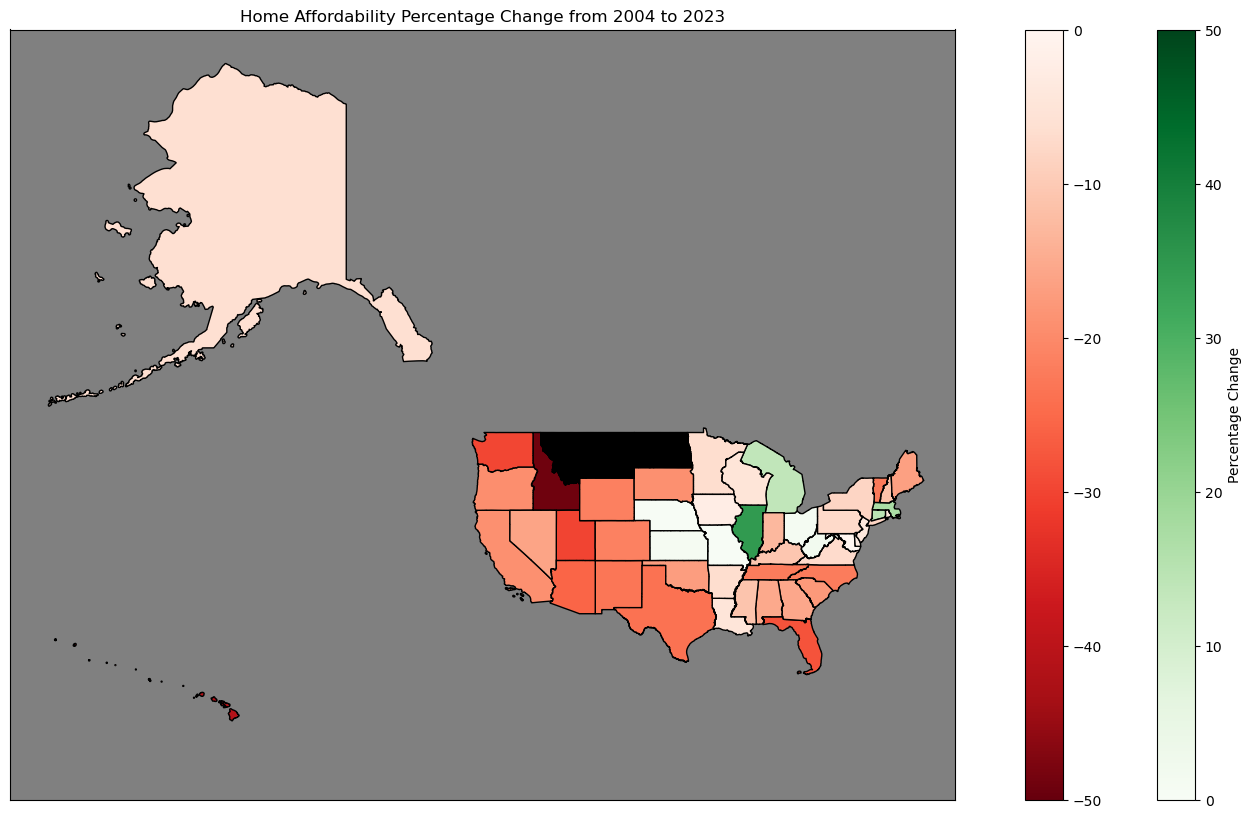

In [350]:
# Map of percent change in home affordability from 2004 to 2023
# These are layered maps to get multiple colors (red < 0, green >= 0, black for na)

# Merge home value and income data with shape data
state_shape_pct = state_shape.merge(ratios_df, on="Code")

fig, ax = plt.subplots(figsize=(20, 10))

# Focus map space
ax.set_ylim(1000000, 12000000)
ax.set_xlim(-20500000, -7000000)

# Remove coordinate axis ticks unnecessary for this plot
ax.set_xticks([])
ax.set_yticks([])

fig1 = state_shape_pct[state_shape_pct['Percent Change'] >= 0].plot(ax=ax, cmap='Greens', column='Percent Change', edgecolor='black', vmin=0, vmax=50,
                                                                    legend=True, legend_kwds={'label': 'Percentage Change', 'pad': -0.05})

fig2 = state_shape_pct[state_shape_pct['Percent Change'] < 0].plot(ax=ax, cmap='Reds_r', column='Percent Change', edgecolor='black', vmin=-50, vmax=0,
                                                                   legend=True)
fig3 = state_shape_pct[state_shape_pct['Percent Change'].isna()].plot(ax=ax, color='Black', edgecolor='black')
fig1.set_facecolor('gray')
plt.title('Home Affordability Percentage Change from 2004 to 2023')

figure_count = save_figure(figure_count, "Map_Home_Affordability_Pct_Change.png")

In [351]:
# load csv data for state population
state_pop = Path("../Data/State_Population.csv")
state_pop = pd.read_csv(state_pop)
state_pop

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,112468.897763,187235.313336,166981.743111,101330.145359,320965.660495,222891.848203,240366.466568,197922.447840,267170.444443,...,120966.245893,122685.992092,120843.533394,180548.766033,159287.338362,177558.177299,212860.778161,86900.603167,150926.440573,154013.426255
1,2004-02-01,112725.088423,187841.549097,167847.418906,101783.232071,325732.847350,223182.101684,242095.673819,199353.176577,270092.529977,...,121415.468933,123007.298345,121661.051633,180839.208311,160645.635537,179308.464022,214128.636011,87419.094513,151705.824485,154493.152088
2,2004-03-01,113012.039266,188271.790840,168900.513316,102304.179582,331170.356031,223520.345262,243749.324603,200834.169881,273584.934185,...,122002.587018,123363.249017,122955.182386,181171.778189,162105.970945,181345.555866,215461.768858,88034.036663,152507.819145,155126.857142
3,2004-04-01,113305.182222,189382.536002,170180.251404,102880.788798,337412.489527,224019.582683,245757.604398,202654.263263,277048.370050,...,122502.409568,123763.276144,124239.434257,181569.731315,163691.500174,183784.251765,217005.863589,88581.017025,153457.607735,155979.327633
4,2004-05-01,113666.681304,190588.147633,171738.808920,103421.568193,344599.782061,224670.441514,248250.261007,204843.252789,281171.423631,...,123091.200481,124167.724328,125300.686962,181787.254249,165682.582390,186704.735618,218988.123794,89089.913281,154662.247862,157153.052502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2024-05-01,227524.247038,363290.965144,432274.680739,205896.930970,764707.162319,542918.099073,401491.607133,386560.209990,610515.235862,...,306531.025094,319367.918462,302475.250490,518697.334077,395677.003125,387947.017497,587071.326297,164601.308284,302491.010264,348244.039504
245,2024-06-01,228061.268922,363854.251343,432533.104343,206730.235098,767178.618740,542727.516817,403398.170324,386830.584595,607440.550149,...,306824.690717,320352.089485,302243.927123,518355.289407,397105.533635,389466.481347,588415.061874,165730.883276,304060.266106,349001.632364
246,2024-07-01,228135.820387,364036.253448,432162.979260,207159.230291,769174.440854,542427.979618,404912.797158,386417.123902,604398.509443,...,306768.273498,320732.719405,301684.071632,517456.432249,396759.976718,390381.307395,588964.665940,166679.375349,304939.825318,349521.144205
247,2024-08-01,227995.823618,364120.059471,431359.869290,207546.207005,770943.060728,542574.854415,406441.864296,386519.200325,601682.706988,...,307010.535770,320507.222400,301269.529498,516881.755176,396336.393013,391307.648836,589475.534421,167259.074236,305877.340380,350933.427970


In [352]:
# Formatted 'Date' column to datetime
state_pop['Date'] = pd.to_datetime(state_pop['Date'])

# Extract the year from the 'Date' column
state_pop['Year'] = state_pop['Date'].dt.year

# Filter data from 2004 to current
state_pop_filtered = state_pop[state_pop['Year'] >= 2004]

# Grouped data by 'Year' and calculate the state average for each year
state_pop_avg = state_pop_filtered.drop(columns=['Date', 'Year']).mean(axis=1).groupby(state_pop_filtered['Year']).mean()

# Formatted the results to 2 decimal places
state_pop_avg = state_pop_avg.round(2)

# Converted the result into a DataFrame and add the column name 'U.S. Average'
state_pop_avg_df = pd.DataFrame(state_pop_avg)
state_pop_avg_df.columns = ['U.S. Pop Avg.']

# Displayed results
state_pop_avg_df

,U.S. Pop Avg.
Year,
2004,175862.63
2005,196628.16
2006,214210.08
2007,217579.23
2008,208241.76
2009,191415.51
2010,185657.04
2011,177631.77
2012,176440.37


In [353]:
# Calculated the YoY percentage change
state_pop_avg_df['YoY Population Change (%)'] = state_pop_avg_df['U.S. Pop Avg.'].pct_change() * 100

# Formatted the results to 2 decimal places
state_pop_avg_df['YoY Population Change (%)'] = state_pop_avg_df['YoY Population Change (%)'].round(2)

# dropped null values
state_pop_avg_df = state_pop_avg_df.dropna(subset=['YoY Population Change (%)'])

# Displayed result
state_pop_avg_df

,U.S. Pop Avg.,YoY Population Change (%)
Year,,
2005,196628.16,11.81
2006,214210.08,8.94
2007,217579.23,1.57
2008,208241.76,-4.29
2009,191415.51,-8.08
2010,185657.04,-3.01
2011,177631.77,-4.32
2012,176440.37,-0.67
2013,186568.09,5.74


In [354]:
# loaded csv housing inventory US data
housing_inventory = Path("../Data/Housing_Inventory_US.csv")
home_inventory = pd.read_csv(housing_inventory)

# Converted to dataframe 
home_inventory_df = pd.DataFrame(home_inventory)

# Displayed results
home_inventory_df

,DATE,Housing Inventory (US)
0,2004-01-01,122632.0
1,2004-04-01,123099.0
2,2004-07-01,123587.0
3,2004-10-01,124096.0
4,2005-01-01,124611.0
...,...,...
78,2023-07-01,145474.0
79,2023-10-01,145863.0
80,2024-01-01,146252.0
81,2024-04-01,146640.0


In [355]:
# Formatted 'Date' column to datetime
home_inventory_df['DATE'] = pd.to_datetime(home_inventory_df['DATE'])

# Extract the year from the 'Date' column
home_inventory_df['Year'] = home_inventory_df['DATE'].dt.year

# Grouped data by 'Year' and aggregated the Housing Inventory US totals for that year 
us_home_inv_df = home_inventory_df.groupby('Year')['Housing Inventory (US)'].sum().reset_index()

# Drop 2016 due to incomplete data set for that year
us_home_inv_df = us_home_inv_df[us_home_inv_df['Year'] != 2016]

# Displayed results
us_home_inv_df

,Year,Housing Inventory (US)
0,2004,493414.0
1,2005,501452.0
2,2006,509195.0
3,2007,516261.0
4,2008,521658.0
5,2009,525073.0
6,2010,527244.0
7,2011,529209.0
8,2012,531319.0
9,2013,534034.0


In [356]:
# Calculate the YoY percentage change
us_home_inv_df['YoY Inventory Change (%)'] = us_home_inv_df['Housing Inventory (US)'].pct_change() * 100

# Formatted the results to 2 decimal places
us_home_inv_df['YoY Inventory Change (%)'] = us_home_inv_df['YoY Inventory Change (%)'].round(2)

us_home_inv_df = us_home_inv_df.dropna(subset=['YoY Inventory Change (%)'])
# Displayed results
print(us_home_inv_df)

    Year  Housing Inventory (US)  YoY Inventory Change (%)
1   2005                501452.0                      1.63
2   2006                509195.0                      1.54
3   2007                516261.0                      1.39
4   2008                521658.0                      1.05
5   2009                525073.0                      0.65
6   2010                527244.0                      0.41
7   2011                529209.0                      0.37
8   2012                531319.0                      0.40
9   2013                534034.0                      0.51
10  2014                537282.0                      0.61
11  2015                540804.0                      0.66
13  2017                548892.0                      1.50
14  2018                553389.0                      0.82
15  2019                558045.0                      0.84
16  2020                563049.0                      0.90
17  2021                568542.0                      0.

In [357]:
# merged us_home_inv_df and state_pop_avg_df
home_inv_vs_pop_df = pd.merge(us_home_inv_df,state_pop_avg_df, how="outer", on="Year")

# Dropped null values
home_inv_vs_pop_df = home_inv_vs_pop_df.dropna()

# Exclude 2024. Incomplete data for 2024 as the year is not over yet. 
home_inv_vs_pop_df = home_inv_vs_pop_df[home_inv_vs_pop_df['Year'] != 2024]

# filtered data between 2017 and 2023
home_inv_vs_pop_df = home_inv_vs_pop_df[home_inv_vs_pop_df['Year'] >= 2017]

# displayed results
home_inv_vs_pop_df 

,Year,Housing Inventory (US),YoY Inventory Change (%),U.S. Pop Avg.,YoY Population Change (%)
12,2017,548892.0,1.50,230605.54,5.34
13,2018,553389.0,0.82,244094.82,5.85
14,2019,558045.0,0.84,255115.32,4.51
15,2020,563049.0,0.90,270742.71,6.13
16,2021,568542.0,0.98,310481.66,14.68
17,2022,574858.0,1.11,350907.08,13.02
18,2023,581119.0,1.09,356610.26,1.63


In [358]:
# Calculated the compounded annual growth rate of new home listings between 2017 and 2023
housing_inv_2017 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2017, 'Housing Inventory (US)'].values[0]
housing_inv_2023 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2023, 'Housing Inventory (US)'].values[0]
CAGR_inv = (housing_inv_2023/housing_inv_2017)**(1/6)
CAGR_inv = (CAGR_inv-1)*100
CAGR_inv

0.955432967058556

In [359]:
# Calculated the compounded annual growth rate of U.S. Population between 2017 and 2023
pop_2017 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2017, 'U.S. Pop Avg.'].values[0]
pop_2023 = home_inv_vs_pop_df.loc[home_inv_vs_pop_df['Year'] == 2023, 'U.S. Pop Avg.'].values[0]
CAGR_pop = (pop_2023/pop_2017)**(1/6)
CAGR_pop = (CAGR_pop-1)*100
CAGR_pop

7.536034222982724

In [360]:
# Defined the x axis
x_axis = home_inv_vs_pop_df['Year'].astype(int)

# reset index
y_axis_inv = home_inv_vs_pop_df.reset_index(drop=True)

# Defined the y axis for housing inventory
y_axis_inv = (y_axis_inv['YoY Inventory Change (%)'])


In [361]:
# reset index
y_axis_pop = home_inv_vs_pop_df.reset_index(drop=True)

# Defined y axis for U.S. Population
y_axis_pop = (y_axis_pop['YoY Population Change (%)'])

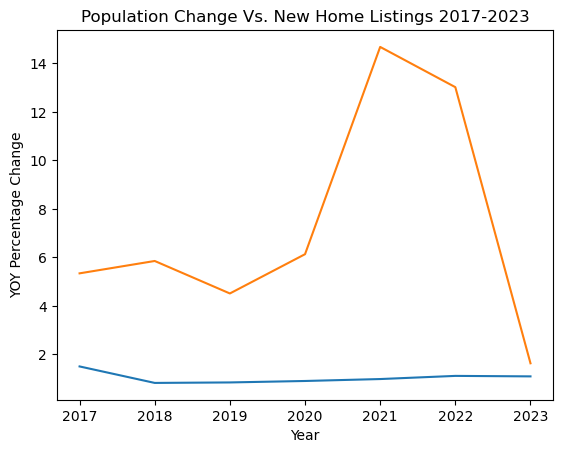

In [362]:
# Ensuring that the data type is an integer
x_axis = home_inv_vs_pop_df['Year'].astype(int)

# Plot the data
plt.plot(x_axis, y_axis_inv, label="YoY Inventory Change (%)")
plt.plot(x_axis, y_axis_pop, label="YoY Population Change (%)")

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("YOY Percentage Change")
plt.title("Population Change Vs. New Home Listings 2017-2023")

plt.savefig('../Images/Population_Change_vs_New_Home_Listings_2017_to_2023.png')

In [363]:
# load csv data for WSJ Prime Rate
prime = Path("../Data/WSJ_Prime_Rate.csv")
prime = pd.read_csv(prime)

# Converted to dataframe 
prime_df = pd.DataFrame(prime)

In [364]:
# Formatted 'Date of Rate Change' column to datetime 
prime_df['Date of Rate Change'] = pd.to_datetime(prime_df['Date of Rate Change'], format='%A, %B %d, %Y')

# Extract the year
prime_df['Year'] = prime_df['Date of Rate Change'].dt.year

# Select columns 'Year' and 'Rate (%)'
prime_df = prime_df[['Year', 'Rate (%)']]

# Group data by 'Year' and calculate the mean of 'Rate (%)'
prime_df = prime_df.groupby('Year')['Rate (%)'].mean().reset_index()

# Filtered data from 2004 to current
prime_df = prime_df[prime_df['Year'] >= 2004]

# Reset index
prime_df = prime_df.reset_index(drop=True)

# Create new data for 2009-2014 and 2021. No rate changes occurred in these years.
new_df = pd.DataFrame({'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2021], 
                       'Rate (%)': [4.928571, 4.928571, 4.928571, 4.928571, 4.928571, 4.928571, 3.75]})

# Concatenated the new data to the existing DataFrame
prime_df = pd.concat([prime_df, new_df], ignore_index=True)

# Sorted data by year in ascending order
prime_df = prime_df.sort_values(by='Year', ascending=True).reset_index(drop=True)

# Display the updated DataFrame
prime_df

,Year,Rate (%)
0,2004,4.750000
1,2005,6.375000
2,2006,7.875000
3,2007,7.500000
4,2008,4.928571
5,2009,4.928571
6,2010,4.928571
7,2011,4.928571
8,2012,4.928571
9,2013,4.928571


In [365]:
# Reset index
us_home_inv_df = home_inventory_df.reset_index()[["DATE", "Housing Inventory (US)"]]

# Converted 'Date' column to datetime
us_home_inv_df['DATE'] = pd.to_datetime(us_home_inv_df['DATE'])

# Extract the year from the 'Date' column
us_home_inv_df['Year'] = us_home_inv_df['DATE'].dt.year

# Group by 'Year' and caculated the mean value for Housing Inventory
us_home_inv_df = us_home_inv_df.groupby('Year')['Housing Inventory (US)'].mean().reset_index()

# Displayed results
us_home_inv_df

,Year,Housing Inventory (US)
0,2004,123353.500000
1,2005,125363.000000
2,2006,127298.750000
3,2007,129065.250000
4,2008,130414.500000
5,2009,131268.250000
6,2010,131811.000000
7,2011,132302.250000
8,2012,132829.750000
9,2013,133508.500000


In [366]:
# Merged us_home_inv_df and prime_df
rate_vs_avail_df = pd.merge(us_home_inv_df,prime_df, how="outer", on="Year")

# Displayed results
rate_vs_avail_df

,Year,Housing Inventory (US),Rate (%)
0,2004,123353.500000,4.750000
1,2005,125363.000000,6.375000
2,2006,127298.750000,7.875000
3,2007,129065.250000,7.500000
4,2008,130414.500000,4.928571
5,2009,131268.250000,4.928571
6,2010,131811.000000,4.928571
7,2011,132302.250000,4.928571
8,2012,132829.750000,4.928571
9,2013,133508.500000,4.928571


The r-squared is: 0.0005703265458220814


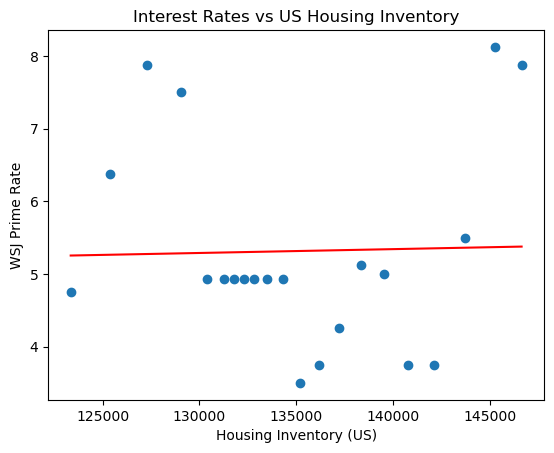

In [367]:
# Defined x and y value
x_values = rate_vs_avail_df['Housing Inventory (US)']
y_values = rate_vs_avail_df['Rate (%)']

# Created the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Created the scatter plot 
plt.scatter(x_values,y_values)

# Formatted the scatter plot and added labels
plt.annotate(line_eq,(125000, 3.25),fontsize=15,color="red")
plt.title('Interest Rates vs US Housing Inventory')
plt.xlabel('Housing Inventory (US)')
plt.ylabel('WSJ Prime Rate')

# Displayed the r-value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../Images/Interest_Rates_vs_US_Housing_Inventory.png')

In [368]:
# loaded csv data for building permits 
build_permit = Path("../Data/Build_Permit.csv")
build_permit = pd.read_csv(build_permit)

# Converted data to dataframe
build_permit_df = pd.DataFrame(build_permit)

In [369]:
build_permit_df

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,2362.659688,228.375488,6125.353891,1292.034177,16135.819376,3688.262428,956.699800,660.943737,10.0,...,573.572977,3237.149612,14011.779391,1779.775705,313.948367,4957.607863,3449.685776,401.012169,3223.911694,273.210497
1,2004-02-01,2295.240670,190.714917,6048.844553,1052.341451,16223.077407,3365.395504,867.594829,739.359216,105.0,...,435.726383,3588.560738,14089.163796,1661.860011,194.084734,4893.406704,3205.731578,451.318249,3290.050681,210.088604
2,2004-03-01,3019.797614,248.156023,7132.259490,1097.886143,17173.783094,4012.430210,994.390833,783.786522,38.0,...,572.075383,4733.472770,15180.040091,1990.707014,340.610045,5156.859073,3983.673366,495.385023,3213.997928,247.925462
3,2004-04-01,2425.664445,282.369728,7405.707855,1633.830391,16985.603333,3927.088989,944.699453,532.186749,727.0,...,480.988435,3553.838905,15296.327936,2058.375536,354.831705,5571.010519,3815.362772,465.042114,3388.201748,226.662655
4,2004-05-01,2386.274858,329.782850,6719.256073,1553.764383,16074.646047,3875.006716,798.956106,677.534504,19.0,...,455.595292,3457.318033,15798.133029,1892.606713,316.215130,4887.010131,3747.312217,390.333664,2686.990125,226.767621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2024-05-01,2130.778251,187.099856,4712.299950,993.476026,9309.683175,2729.362146,390.703736,500.452844,40.0,...,405.835320,4588.909623,17994.787753,1992.807008,236.080019,3020.521134,3021.203136,326.455239,1824.845398,178.905168
245,2024-06-01,1425.227511,54.436120,5002.911556,1039.854609,7439.517109,2365.510555,342.230598,531.342151,88.0,...,428.686491,3090.488006,16576.701925,1816.611354,153.914889,2498.320334,2504.619788,284.460764,1686.740849,111.642479
246,2024-07-01,1441.794418,51.278264,4726.195003,999.990223,8980.732760,2610.768314,490.878662,479.514924,149.0,...,459.410735,3494.679562,18744.671898,1777.664000,271.421887,3050.467570,3086.468122,345.226664,1960.288991,161.285931
247,2024-08-01,1642.490426,52.890347,5016.083789,1101.317104,7798.401522,2070.388259,427.327711,481.568485,54.0,...,807.910439,4073.951412,18363.133737,1770.653975,164.798177,3016.161790,2845.683878,342.031403,1598.073455,139.749790


In [370]:
# Converted 'Date' column to datetime
build_permit_df['Date'] = pd.to_datetime(build_permit_df['Date'])

# Extract the year from the 'Date' column
build_permit_df['Year'] = build_permit_df['Date'].dt.year

# Drop 'Date' Column
build_permit_df.drop(columns=["Date"], inplace=True)

# Group data by year
build_permit_df = build_permit_df.groupby('Year').sum()

# Calculated the mean for all states in each year
build_permit_df['Average Build Permits in US'] = build_permit_df.mean(axis=1)

# Calculated the sum for all states in each year
build_permit_df['Total Build Permits in US'] = build_permit_df.sum(axis=1)

# Formatted data to 2 decimal places
build_permit_df['Average Build Permits in US'] = build_permit_df['Average Build Permits in US'].round(2)
build_permit_df['Total Build Permits in US'] = build_permit_df['Total Build Permits in US'].map('{:09.2f}'.format)
build_permit_df = build_permit_df[['Average Build Permits in US', 'Total Build Permits in US']]

# Displayed data
build_permit_df

,Average Build Permits in US,Total Build Permits in US
Year,,
2004,39384.73,2048005.76
2005,41537.54,2159952.14
2006,35633.50,1852941.96
2007,26797.55,1393472.53
2008,17095.35,888958.30
2009,11095.38,576959.93
2010,11621.27,604306.28
2011,11925.96,620150.10
2012,15821.12,822698.19


In [371]:
# Merged us_home_inv_df and build_permit_df

build_vs_avail_df = pd.merge(us_home_inv_df,build_permit_df, how="outer", on="Year")
build_vs_avail_df

,Year,Housing Inventory (US),Average Build Permits in US,Total Build Permits in US
0,2004,123353.500000,39384.73,2048005.76
1,2005,125363.000000,41537.54,2159952.14
2,2006,127298.750000,35633.50,1852941.96
3,2007,129065.250000,26797.55,1393472.53
4,2008,130414.500000,17095.35,888958.30
5,2009,131268.250000,11095.38,576959.93
6,2010,131811.000000,11621.27,604306.28
7,2011,132302.250000,11925.96,620150.10
8,2012,132829.750000,15821.12,822698.19
9,2013,133508.500000,18943.24,985048.61


The r-squared is: 0.004945153088260975


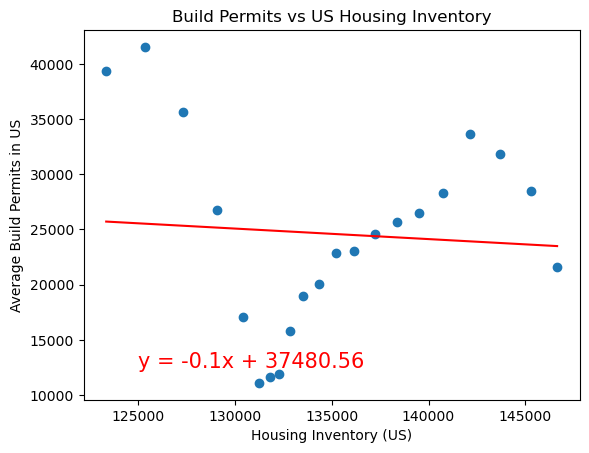

In [372]:
# Defined x and y value
x_values = build_vs_avail_df['Housing Inventory (US)']
y_values = build_vs_avail_df['Average Build Permits in US']

# Created the linear regression line

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Created the scatter plot 
plt.scatter(x_values,y_values)

# Formatted the scatter plot and added labels
plt.annotate(line_eq,(125000, 12500),fontsize=15,color="red")
plt.title('Build Permits vs US Housing Inventory')
plt.xlabel('Housing Inventory (US)')
plt.ylabel('Average Build Permits in US')

# Displayed the r-value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../Images/Build_Permits_vs_US_Housing_Inventory.png')

In [373]:
# load csv data for Housing Vacancies, Housing Vacancies for Sale, 
# and Housing Vacancies for Rent

rental_vacancy = Path("../Data/Vacant_Housing_Rent.csv")
rental_vacancy_df = pd.read_csv(rental_vacancy)

home_vacancy_sale = Path("../Data/Vacant_Housing_Sale.csv")
home_vacancy_sale_df = pd.read_csv(home_vacancy_sale)

us_home_vacancy = Path("../Data/Vacant_Housing_US.csv")
vacancy_df = pd.read_csv(us_home_vacancy)

In [374]:
# reset index
us_home_vacancy_df = vacancy_df.reset_index()[["DATE", "US Home Vacancy"]]

# Converted 'DATE' column to datetime
us_home_vacancy_df['DATE'] = pd.to_datetime(us_home_vacancy_df['DATE'])

# Extracted the year from the 'DATE' column
us_home_vacancy_df['Year'] = us_home_vacancy_df['DATE'].dt.year

# Group by 'Year' and calculated the mean
us_home_vacancy_df = us_home_vacancy_df.groupby('Year')['US Home Vacancy'].mean().reset_index()

# Displayed results
us_home_vacancy_df

,Year,US Home Vacancy
0,2004,15747.750000
1,2005,15878.750000
2,2006,16602.500000
3,2007,17807.500000
4,2008,18741.750000
5,2009,18972.750000
6,2010,18908.000000
7,2011,18758.250000
8,2012,18270.750000
9,2013,18222.000000


In [375]:
# reset index
home_vacancy_sale_df = home_vacancy_sale_df.reset_index()[["DATE", "Vacant Housing For Sale"]]

# Converted 'DATE' column to datetime
home_vacancy_sale_df['DATE'] = pd.to_datetime(home_vacancy_sale_df['DATE'])

# Extracted the year from the 'DATE' column
home_vacancy_sale_df['Year'] = home_vacancy_sale_df['DATE'].dt.year

# Group by 'Year' and calculated the mean value for Vacant Housing
home_vacancy_sale_df = home_vacancy_sale_df.groupby('Year')['Vacant Housing For Sale'].mean().reset_index()

# Displayed results
home_vacancy_sale_df

,Year,Vacant Housing For Sale
0,2004,1319.250000
1,2005,1467.500000
2,2006,1853.500000
3,2007,2135.000000
4,2008,2229.750000
5,2009,2036.000000
6,2010,2000.250000
7,2011,1902.250000
8,2012,1555.750000
9,2013,1538.250000


In [376]:
# reset index
rental_vacancy_df = rental_vacancy_df.reset_index()[["DATE", "Vacant Housing For Rent"]]

# Convert 'Date' to datetime and extract the year
rental_vacancy_df['DATE'] = pd.to_datetime(rental_vacancy_df['DATE'])

# Converted 'DATE' column to datetime
rental_vacancy_df['Year'] = rental_vacancy_df['DATE'].dt.year

# Group by 'Year' and calculated the mean for Vacant Housing for Rent
rental_vacancy_df = rental_vacancy_df.groupby('Year')['Vacant Housing For Rent'].mean().reset_index()

# Displayed results
rental_vacancy_df

,Year,Vacant Housing For Rent
0,2004,3838.500000
1,2005,3764.250000
2,2006,3772.250000
3,2007,3880.000000
4,2008,4063.750000
5,2009,4428.750000
6,2010,4322.750000
7,2011,4086.750000
8,2012,3825.250000
9,2013,3694.500000


In [377]:
# Created new dataframe by merging rental_vacancy_df with home_vacancy_sale_df
housing_availability_df = pd.merge(rental_vacancy_df,home_vacancy_sale_df, how="outer", on="Year")

# Merged new dataframe with us_home_vacancy
housing_availability_df = pd.merge(housing_availability_df,us_home_vacancy_df, how="outer", on="Year")

# Merged revised new dataframe with us_home_inv_df
housing_availability_df = pd.merge(housing_availability_df,us_home_inv_df, how="outer", on="Year")

# Established the order in which the columns should be displayed
rearrange_data = ['Year', 'Housing Inventory (US)', 'US Home Vacancy', 'Vacant Housing For Sale','Vacant Housing For Rent']

#rearranged the order of the columns
housing_availability_df = housing_availability_df[rearrange_data]

# Displayed results
housing_availability_df

,Year,Housing Inventory (US),US Home Vacancy,Vacant Housing For Sale,Vacant Housing For Rent
0,2004,123353.500000,15747.750000,1319.250000,3838.500000
1,2005,125363.000000,15878.750000,1467.500000,3764.250000
2,2006,127298.750000,16602.500000,1853.500000,3772.250000
3,2007,129065.250000,17807.500000,2135.000000,3880.000000
4,2008,130414.500000,18741.750000,2229.750000,4063.750000
5,2009,131268.250000,18972.750000,2036.000000,4428.750000
6,2010,131811.000000,18908.000000,2000.250000,4322.750000
7,2011,132302.250000,18758.250000,1902.250000,4086.750000
8,2012,132829.750000,18270.750000,1555.750000,3825.250000
9,2013,133508.500000,18222.000000,1538.250000,3694.500000


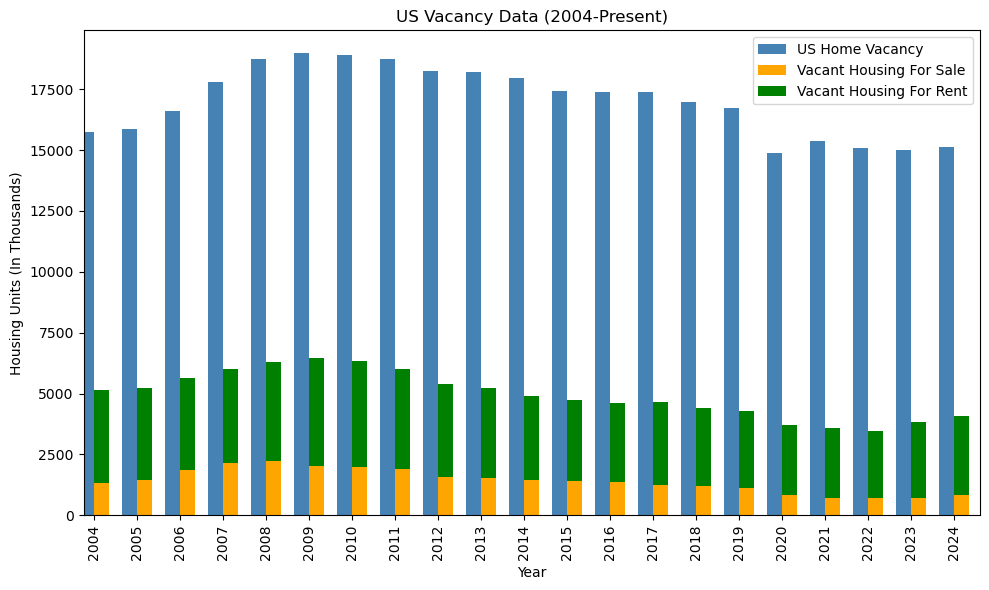

<Figure size 640x480 with 0 Axes>

In [378]:

# Converted data to dataframe
housing_availability_df = pd.DataFrame(housing_availability_df)
# Set index
housing_availability_df.set_index('Year', inplace=True)

# Formatted the size of the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting 'US Home Vacancy' as a separate bar (non-stacked)
housing_availability_df['US Home Vacancy'].plot(kind='bar', ax=ax, position=1, width=0.35, color='steelblue', label='US Home Vacancy')

# Stacked bar for 'Vacant Housing For Sale' and 'Vacant Housing For Rent'
housing_availability_df[['Vacant Housing For Sale', 'Vacant Housing For Rent']].plot(kind='bar', ax=ax, stacked=True, position=0, width=0.35, color=['orange', 'green'], label=['Vacant Housing For Sale', 'Vacant Housing For Rent'])

# Created a legend
ax.legend(['US Home Vacancy', 'Vacant Housing For Sale', 'Vacant Housing For Rent'])

# Created labels for the bar chart
plt.title('US Vacancy Data (2004-Present)')
plt.xlabel('Year')
plt.ylabel('Housing Units (In Thousands)')

# Compact the bar chart
plt.tight_layout()
# Displayed bar chart
plt.show()

plt.savefig('../Images/US_Vacancy_Data_(2004_to_Present).png')

In [379]:
# Reading the csv file
csv_path = "../Data/2007-2023-PIT-Counts-by-State.csv"
df = pd.read_csv(csv_path)
df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
3,AS,0.0,,,,,,,,,...,,,,,,,,,,
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0


In [380]:
# Dropping all rows that have data from non-states
df = df[df['State'] != 'DC']
df = df[df['State'] != 'GU']
df = df[df['State'] != 'PR']
df = df[df['State'] != 'MP']
df = df[df['State'] != 'VI']

# Dropping State "AS" because it has no recorded data
df = df[df['State'] != 'AS']

# Dropping the rows that have states in the non-states list
df = df[df['State'] != 'Total']

# Dropping the final row because all the data is "NaN"
df.dropna(inplace=True)

df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0
5,CA,44.0,"57,468","12,424","4,288","39,950","25,230","31,319",338,126,...,745,373,254,627,118,963,497,295,792,171


In [381]:
# Checking the count of the states column
df['State'].count()

50

In [382]:
df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0
5,CA,44.0,"57,468","12,424","4,288","39,950","25,230","31,319",338,126,...,745,373,254,627,118,963,497,295,792,171


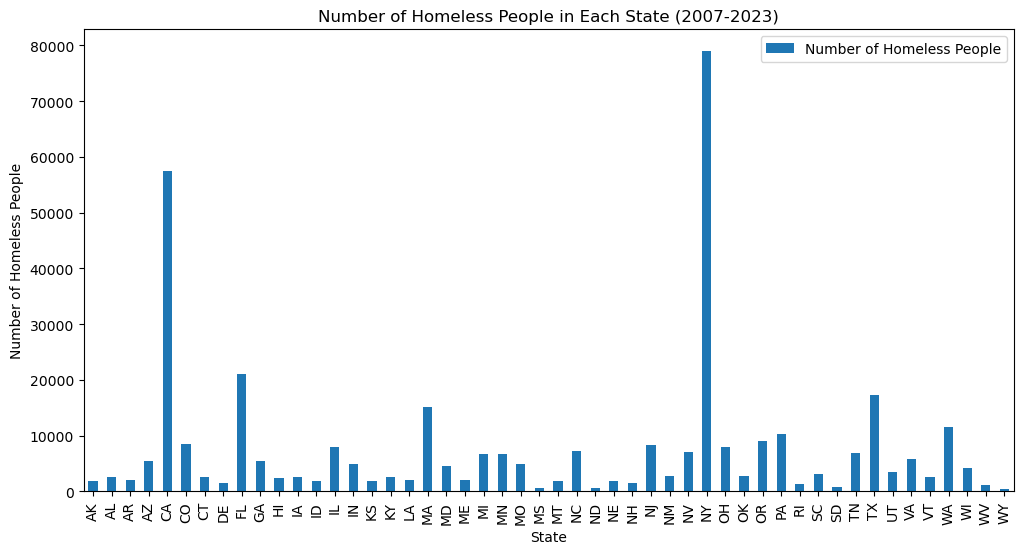

In [383]:
# Removing commas from values
df['Overall Homeless'] = df['Overall Homeless'].str.replace(",", "")
overall_homeless_df = pd.DataFrame({'Number of Homeless People': df['Overall Homeless'].values.astype(int)},
    index=df['State']
)

homeless_plot = overall_homeless_df.plot(kind='bar', title='Number of Homeless People in Each State (2007-2023)',
                                         xlabel='State', ylabel='Number of Homeless People', figsize=(12, 6));
fig = homeless_plot.get_figure()
fig.savefig('../Images/US_homeless_per_state.png')

In [384]:
overall_homeless_df.sort_values('Number of Homeless People')

,Number of Homeless People
State,
WY,405
ND,548
MS,626
SD,817
WV,1138
RI,1267
NH,1491
DE,1579
MT,1801


In [385]:
# Getting the total number of homeless people
overall_homeless_df['Number of Homeless People'].sum()

374702

In [386]:
state_abbreviations = {"Alabama": "AL",
                       "Alaska": "AK",
                       "Arizona": "AZ",
                       "Arkansas": "AR",
                       "California": "CA",
                       "Colorado":"CO",
                       "Connecticut": "CT",
                       "Delaware": "DE",
                       "District of Columbia": "DC",
                       "Florida": "FL",
                       "Georgia": "GA",
                       "Hawaii": "HI",
                       "Idaho": "ID",
                       "Illinois": "IL", 
                       "Indiana": "IN",
                       "Iowa": "IA",
                       "Kansas": "KS",
                       "Kentucky": "KY",
                       "Louisiana": "LA",
                       "Maine": "ME",
                       "Maryland": "MD",
                       "Massachusetts":"MA",
                       "Michigan": "MI",
                       "Minnesota": "MN",
                       "Mississippi": "MS",
                       "Missouri": "MO",
                       "Montana": "MT",
                       "Nebraska": "NE",
                       "Nevada": "NV",
                       "New Hampshire": "NH",
                       "New Jersey": "NJ",
                       "New Mexico": "NM", 
                       "New York": "NY",
                       "North Carolina": "NC",
                       "North Dakota": "ND",
                       "Ohio": "OH",
                       "Oklahoma": "OK",
                       "Oregon": "OR",
                       "Pennsylvania": "PA",
                       "Rhode Island": "RI",
                       "South Carolina": "SC",
                       "South Dakota": "SD",
                       "Tennessee": "TN",
                       "Texas": "TX",
                       "Utah": "UT",
                       "Vermont": "VT",
                       "Virginia": "VA",
                       "Washington": "WA",
                       "West Virginia": "WV",
                       "Wisconsin": "WI",
                       "Wyoming": "WY",
         }

In [387]:
# Reading median unemployment csv file
med_unemployment_csv = '../Data/Median_Unemployment_Rates_per_Year.csv'
unemployment_df = pd.read_csv(med_unemployment_csv)
unemployment_df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Median
0,2004,5.65,7.45,4.95,5.55,6.25,5.50,5.1,4.30,8.20,...,5.30,5.95,5.05,3.65,4.1,6.25,5.70,4.95,3.80,5.30
1,2005,4.35,6.95,4.70,5.25,5.30,5.05,4.8,4.50,6.85,...,5.40,5.40,4.05,3.45,3.9,5.60,5.40,4.70,3.55,4.90
2,2006,4.00,6.65,4.40,5.30,4.90,4.35,4.4,3.95,6.35,...,5.40,5.15,2.85,3.75,3.3,5.00,5.20,4.70,3.00,4.50
3,2007,4.00,6.30,3.75,5.40,5.25,3.65,4.4,3.60,5.90,...,4.55,4.40,2.55,3.90,3.2,4.60,4.80,4.80,2.70,4.45
4,2008,5.75,6.50,5.70,5.20,7.15,4.75,5.6,4.85,6.70,...,6.50,4.75,3.20,4.55,4.2,5.25,4.55,4.65,2.85,5.25


In [388]:
# Reading the median income csv file
med_income_csv = '../Data/Median_Income.csv'
# med_income_csv = '../Work_David/Data/median_income.csv'
income_df = pd.read_csv(med_income_csv)
income_df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
1,2005-01-01,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2,2006-01-01,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
3,2007-01-01,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
4,2008-01-01,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [389]:
# Cleaning the income_df dataframe
income_df['Year'] = income_df['Date'].str.split('-', expand=True)[0]
income_df = income_df.drop(columns=['Date', 'United States'])
income_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,43450.0,40540.0,...,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0,2004
1,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,44990.0,42990.0,...,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0,2005
2,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,48480.0,45680.0,...,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0,2006
3,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,50780.0,45790.0,...,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0,2007
4,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,55590.0,44860.0,...,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0,2008


In [390]:
income_df = income_df.groupby('Year').median()
income_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2004,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,43450.0,40540.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,44990.0,42990.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,48480.0,45680.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,50780.0,45790.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,55590.0,44860.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [391]:
# Creating a dataframe for the median incomes and median unemployment rates for each state
states = unemployment_df.columns.unique()
states = states.drop(['Year', 'Median'])
data = pd.DataFrame({'State': state_abbreviations,
                     'Median Income': income_df[states].median(),
                     'Median Unemployment Rate': unemployment_df[states].median()})
data.set_index('State', inplace=False)
data.head()

,State,Median Income,Median Unemployment Rate
Alabama,AL,44495.0,5.55
Alaska,AK,68180.0,6.60
Arizona,AZ,50750.0,5.15
Arkansas,AR,42050.0,5.25
California,CA,60640.0,6.25


In [392]:
import scipy.stats as st

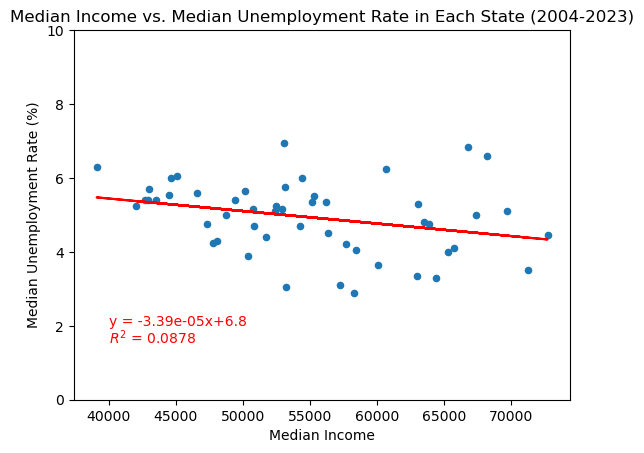

In [393]:
# Plotting the relationship of median income and median unemployment rate
plot = data.plot(kind='scatter', x='Median Income', y='Median Unemployment Rate', 
                 ylabel='Median Unemployment Rate (%)',
                 title='Median Income vs. Median Unemployment Rate in Each State (2004-2023)');

# Calculating the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data['Median Income'], data['Median Unemployment Rate'])
plot.plot(data['Median Income'], intercept + slope * data['Median Income'], 'r', label='Fitted line');
plot.set_ylim(0, 10)
plot.annotate(text=f'y = {round(slope, 7)}x+{round(intercept, 2)}', xy=(40000, 2), color='red');
plot.annotate(text=f'$R^2$ = {round(r_value**2, 4)}', xy=(40000, 1.5), color='red');

figure = plot.get_figure()
figure.savefig('../Images/Linear_Regression_Median_Income_vs_Median_Unemployment_Rate.png')

In [394]:
# Reading median unemployment csv file
med_unemployment_csv = '../Data/Median_Unemployment_Rates_per_Year.csv'
unemployment_df = pd.read_csv(med_unemployment_csv)
unemployment_df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Median
0,2004,5.65,7.45,4.95,5.55,6.25,5.50,5.1,4.30,8.20,...,5.30,5.95,5.05,3.65,4.1,6.25,5.70,4.95,3.80,5.30
1,2005,4.35,6.95,4.70,5.25,5.30,5.05,4.8,4.50,6.85,...,5.40,5.40,4.05,3.45,3.9,5.60,5.40,4.70,3.55,4.90
2,2006,4.00,6.65,4.40,5.30,4.90,4.35,4.4,3.95,6.35,...,5.40,5.15,2.85,3.75,3.3,5.00,5.20,4.70,3.00,4.50
3,2007,4.00,6.30,3.75,5.40,5.25,3.65,4.4,3.60,5.90,...,4.55,4.40,2.55,3.90,3.2,4.60,4.80,4.80,2.70,4.45
4,2008,5.75,6.50,5.70,5.20,7.15,4.75,5.6,4.85,6.70,...,6.50,4.75,3.20,4.55,4.2,5.25,4.55,4.65,2.85,5.25


In [395]:
# Reading homeownership csv file
homeownership_csv = '../Data/Homeownership_Rate.csv'
homeownership_df = pd.read_csv(homeownership_csv)
homeownership_df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,69.0,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,...,68.5,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8
1,2005-01-01,68.9,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,...,68.4,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8
2,2006-01-01,68.8,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,...,70.6,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7
3,2007-01-01,68.1,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,...,70.4,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2
4,2008-01-01,67.8,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,...,70.4,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3


In [396]:
homeownership_df['Year'] = homeownership_df['Date'].str.split('-', expand=True)[0]
homeownership_df.drop(columns=['Date', 'United States'], inplace= True)
homeownership_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,45.6,72.2,...,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8,2004
1,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,45.8,72.4,...,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8,2005
2,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,45.9,72.4,...,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7,2006
3,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,47.2,71.8,...,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2,2007
4,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,44.1,71.1,...,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3,2008


In [397]:
median_homeowner_grp = homeownership_df.groupby('Year').median()
median_homeowner_grp.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2004,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,45.6,72.2,...,68.5,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8
2005,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,45.8,72.4,...,68.4,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8
2006,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,45.9,72.4,...,70.6,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7
2007,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,47.2,71.8,...,70.4,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2
2008,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,44.1,71.1,...,70.4,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3


In [398]:
states = unemployment_df.columns.unique()
states = states.drop(['Year', 'Median'])
data = pd.DataFrame({'State': state_abbreviations,
                     'Median Unemployment Rate': unemployment_df[states].median(),
                     'Median Homeownership Rate': median_homeowner_grp[states].median()})
data.set_index('State', inplace=False)
data.head()

,State,Median Unemployment Rate,Median Homeownership Rate
Alabama,AL,5.55,72.95
Alaska,AK,6.60,65.00
Arizona,AZ,5.15,66.30
Arkansas,AR,5.25,67.35
California,CA,6.25,55.30


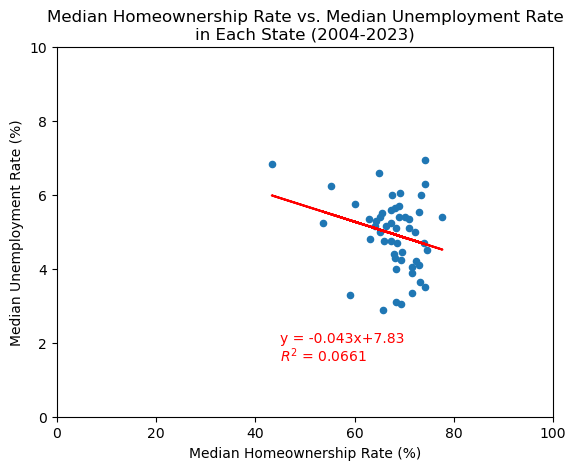

In [399]:
# Plotting the relationship of median homeownersip rate and median unemployment rate
plot = data.plot(kind='scatter', x='Median Homeownership Rate', y='Median Unemployment Rate', 
                 xlabel='Median Homeownership Rate (%)', ylabel='Median Unemployment Rate (%)',
                 title='Median Homeownership Rate vs. Median Unemployment Rate\nin Each State (2004-2023)');

# Calculating the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data['Median Homeownership Rate'], data['Median Unemployment Rate'])
plot.plot(data['Median Homeownership Rate'], intercept + slope * data['Median Homeownership Rate'], 'r', label='Fitted line');
plot.annotate(text=f'y = {round(slope, 3)}x+{round(intercept, 2)}', xy=(45, 2), color='red');
plot.annotate(text=f'$R^2$ = {round(r_value**2, 4)}', xy=(45, 1.5), color='red');

plot.set_xlim(0, 100)
plot.set_ylim(0, 10)

# Saving the image
figure = plot.get_figure()
figure.savefig('../Images/Linear_Regression_Median_Homeownership_Rate_vs_Median_Unemployment_Rate.png')

In [400]:
unemployment_csv = '../Data/Unemployment.csv'
df = pd.read_csv(unemployment_csv)
df.head()

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,...,3.5,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1
1,2004-02-01,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,...,3.5,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0
2,2004-03-01,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,...,3.5,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9
3,2004-04-01,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,...,3.5,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9
4,2004-05-01,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,...,3.6,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8


In [401]:
df['Year'] = df['Date'].str.split('-', expand=True)[0]
df.drop(columns=['Date'], inplace= True)
df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,4.0,...,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1,2004
1,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,4.0,...,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0,2004
2,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,3.9,...,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9,2004
3,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,3.9,...,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9,2004
4,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,3.9,...,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8,2004


In [402]:
# Averaging the data
avg_year_grp = df.groupby('Year').mean()

# Getting the median of all the data
med_year_grp = df.groupby('Year').median()

In [403]:
# Creating the "Average" column in the avg_year_grp
avg_year_grp['Average'] = avg_year_grp.mean(axis=1)

# Creating the "Median" column in the med_year_grp
med_year_grp['Median'] = med_year_grp.median(axis=1)

# Saving the data to csv files
avg_year_grp.to_csv('../Data/Average_Unemployment_Rates_per_Year.csv')
med_year_grp.to_csv('../Data/Median_Unemployment_Rates_per_Year.csv')

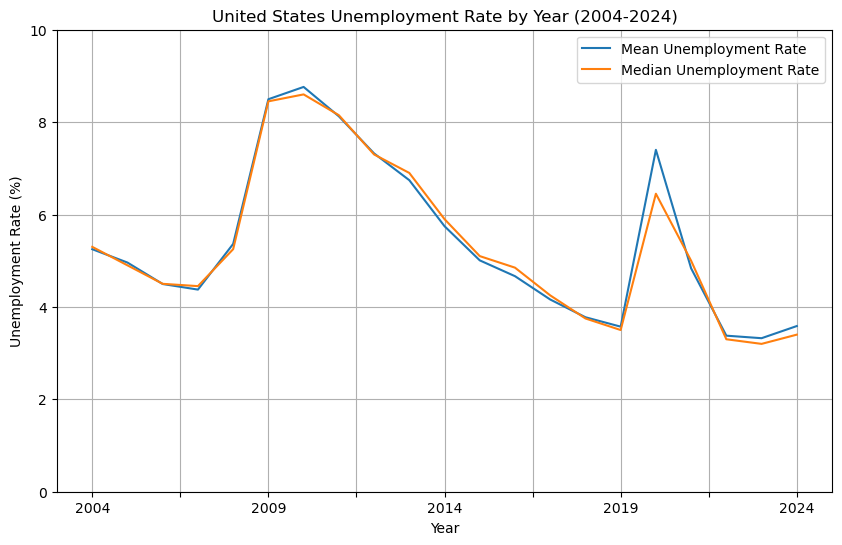

In [404]:
# Plotting the average and the median unemployment rate
overall_unemployed = pd.DataFrame({'Mean Unemployment Rate': avg_year_grp['Average'],
                                   'Median Unemployment Rate': med_year_grp['Median']}, index=df['Year'].unique())
us_plot = overall_unemployed.plot(kind='line', title='United States Unemployment Rate by Year (2004-2024)', 
                                  xlabel='Year', ylabel='Unemployment Rate (%)', figsize=(10, 6),
                                  ylim=(0, 10), grid=True);
fig1 = us_plot.get_figure()
fig1.savefig('../Images/US_unemployment_per_year.png')

In [405]:
states = df.columns.unique()
states = states.drop('Year')
states_totals = pd.DataFrame({'State': state_abbreviations,
                              'Mean Unemployment Rate': df[states].mean(),
                              'Median Unemployment Rate': df[states].median()})
states_totals.set_index('State', inplace=True)
states_totals.head()

,Mean Unemployment Rate,Median Unemployment Rate
State,,
AL,5.632530,5.1
AK,6.563454,6.6
AZ,6.038153,5.2
AR,5.285542,5.3
CA,7.110843,5.8


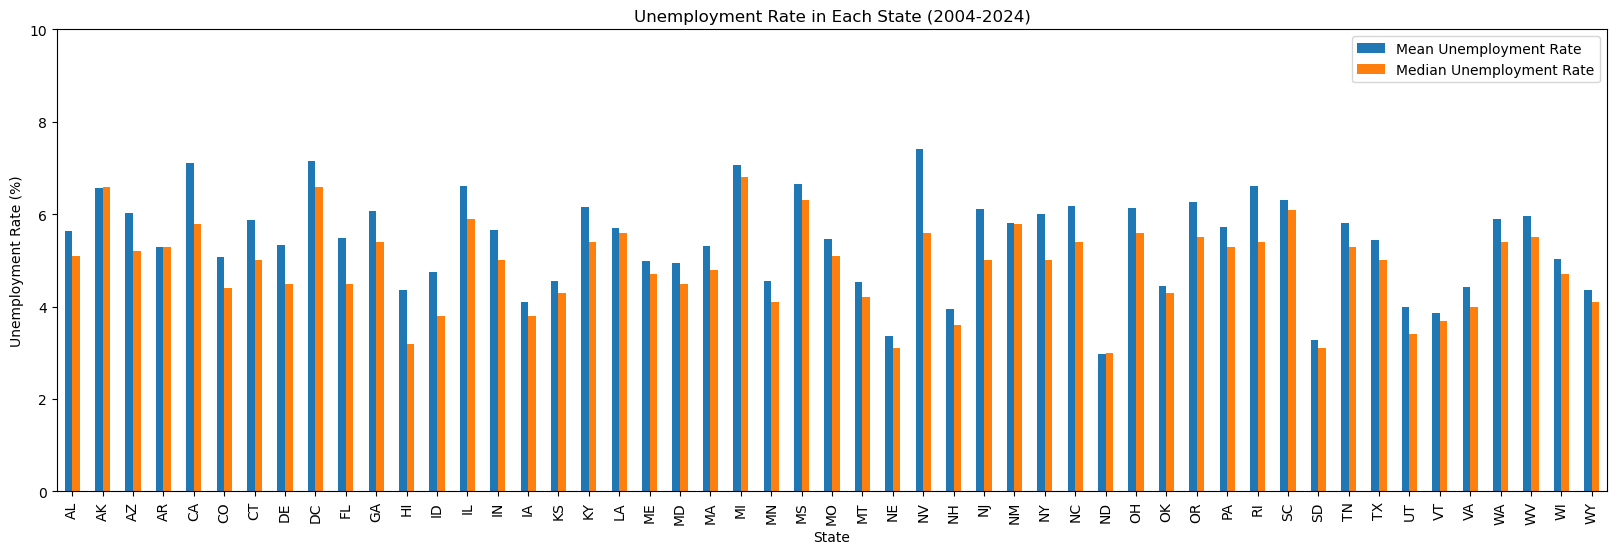

In [406]:
unemployment_plot = states_totals.plot(kind='bar', title='Unemployment Rate in Each State (2004-2024)',
                                       xlabel='State', ylabel='Unemployment Rate (%)', figsize=(20, 6),
                                       ylim=(0, 10));
fig2 = unemployment_plot.get_figure()
fig2.savefig('../Images/US_unemployment_per_state.png')

In [407]:
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [408]:
Edu_csv_path = Path("../Data/Higher_Ed.csv")
home_Owner_path = Path("../Data/Homeownership_Rate.csv")


Higher_Ed_df = pd.read_csv(Edu_csv_path, encoding="utf-8")
home_Ownership_df=pd.read_csv(home_Owner_path, encoding="utf-8")
Higher_Ed_df.to_csv('../Data/Complete_Higher_Ed.csv', index=False)

In [409]:

# Convert the Date index to a column
Higher_Ed_df = Higher_Ed_df.reset_index()

# Check the columns again
print("Columns after resetting the index:", Higher_Ed_df.columns.tolist())

# Now that Date is a column, we can convert it to datetime and set it back as the index if needed
Higher_Ed_df['Date'] = pd.to_datetime(Higher_Ed_df['Date'], errors='coerce')

# Set 'Date' as the index again if necessary
Higher_Ed_df.set_index('Date', inplace=True)

usa_education_data = round(Higher_Ed_df.mean(axis=1),1)

# Optionally, create a DataFrame to store it with 'Date' as a column
usa_education_df = usa_education_data.reset_index()
usa_education_df.columns = ['Date', 'US Avg. Higher Edu']

# Display the result
usa_education_df.head()

Columns after resetting the index: ['index', 'Date', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


,Date,US Avg. Higher Edu
0,2006-01-01,26.2
1,2007-01-01,26.6
2,2008-01-01,26.9
3,2009-01-01,27.1
4,2010-01-01,27.5


In [410]:
US_homeownership_df = home_Ownership_df[['Date', 'United States']].copy()
US_homeownership_df.head()
usa_education_df['Date'] = pd.to_datetime(usa_education_df['Date'], errors='coerce')
US_homeownership_df['Date'] = pd.to_datetime(US_homeownership_df['Date'], errors='coerce')

# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(usa_education_df, US_homeownership_df, on='Date', how='inner')
merged_df.rename(columns={'United States': 'US Homeownership'}, inplace=True)

merged_df.to_csv('../Data/MergedMean.csv', index=False)
US_homeownership_df.to_csv('../Data/Homeownership_mean.csv', index=False)
usa_education_df.to_csv('../Data/Higher_Ed_mean.csv', index=False)
home_Ownership_df.to_csv('../Data/Complete_home_Ownership.csv', index=False)


In [411]:
Higher_Ed_df = pd.read_csv(Edu_csv_path, encoding="utf-8")
home_Ownership_df=pd.read_csv(home_Owner_path, encoding="utf-8")
Higher_Ed_df.to_csv('../Data/Complete_Higher_Ed.csv', index=False)


Higher_Ed_df.head(2)

# Convert the Date index to a column
Higher_Ed_df = Higher_Ed_df.reset_index()

# Check the columns again
print("Columns after resetting the index:", Higher_Ed_df.columns.tolist())

# Now that Date is a column, we can convert it to datetime and set it back as the index if needed
Higher_Ed_df['Date'] = pd.to_datetime(Higher_Ed_df['Date'], errors='coerce')

# Set 'Date' as the index again if necessary
Higher_Ed_df.set_index('Date', inplace=True)

usa_education_data = round(Higher_Ed_df.mean(axis=1),1)

# Optionally, create a DataFrame to store it with 'Date' as a column
usa_education_df = usa_education_data.reset_index()
usa_education_df.columns = ['Date', 'US Avg. Higher Edu']

# Display the result
usa_education_df.head()



US_homeownership_df = home_Ownership_df[['Date', 'United States']].copy()
US_homeownership_df.head()
usa_education_df['Date'] = pd.to_datetime(usa_education_df['Date'], errors='coerce')
US_homeownership_df['Date'] = pd.to_datetime(US_homeownership_df['Date'], errors='coerce')

# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(usa_education_df, US_homeownership_df, on='Date', how='inner')
merged_df.rename(columns={'United States': 'US Homeownership'}, inplace=True)

merged_df
merged_df.to_csv('../Data/MergedMean.csv', index=False)
US_homeownership_df.to_csv('../Data/Homeownership_mean.csv', index=False)
usa_education_df.to_csv('../Data/Higher_Ed_mean.csv', index=False)
home_Ownership_df.to_csv('../Data/Complete_home_Ownership.csv', index=False)


Columns after resetting the index: ['index', 'Date', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [412]:
Clean_Data_df = pd.read_csv("../Data/MergedMean.csv")
HomeOwnerShip_Data_df=pd.read_csv("../Data/Complete_home_Ownership.csv")
HomeOwnerShip_Mean_df=pd.read_csv("../Data/Homeownership_mean.csv")
Higher_Edu_Mean_df=pd.read_csv("../Data/Higher_Ed_mean.csv")
Higher_Edu_Data_df = pd.read_csv("../Data/Complete_Higher_Ed.csv")


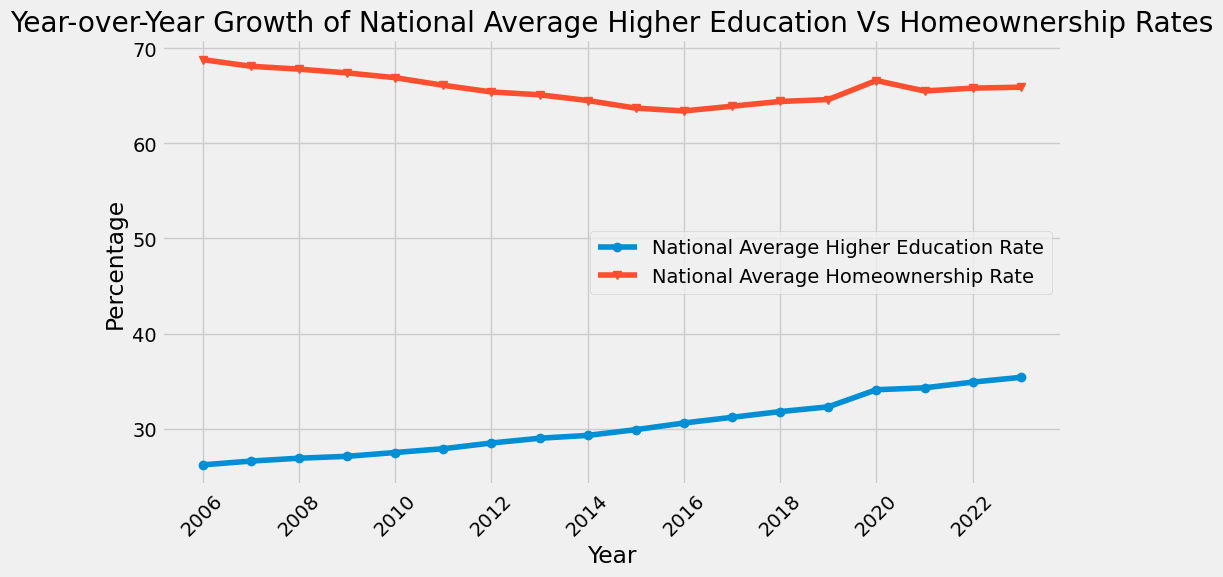

In [413]:
Clean_Data_df['Date'] = pd.to_datetime(Clean_Data_df['Date'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(Clean_Data_df['Date'], Clean_Data_df['US Avg. Higher Edu'], label='National Average Higher Education Rate', marker='o')
plt.plot(Clean_Data_df['Date'], Clean_Data_df['US Homeownership'], label='National Average Homeownership Rate', marker='v')

# Adding labels and title
plt.title('Year-over-Year Growth of National Average Higher Education Vs Homeownership Rates')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

figure.savefig('../Images/YOY_Growth_Higher_ED_vs_Homeownership_Rates.png')

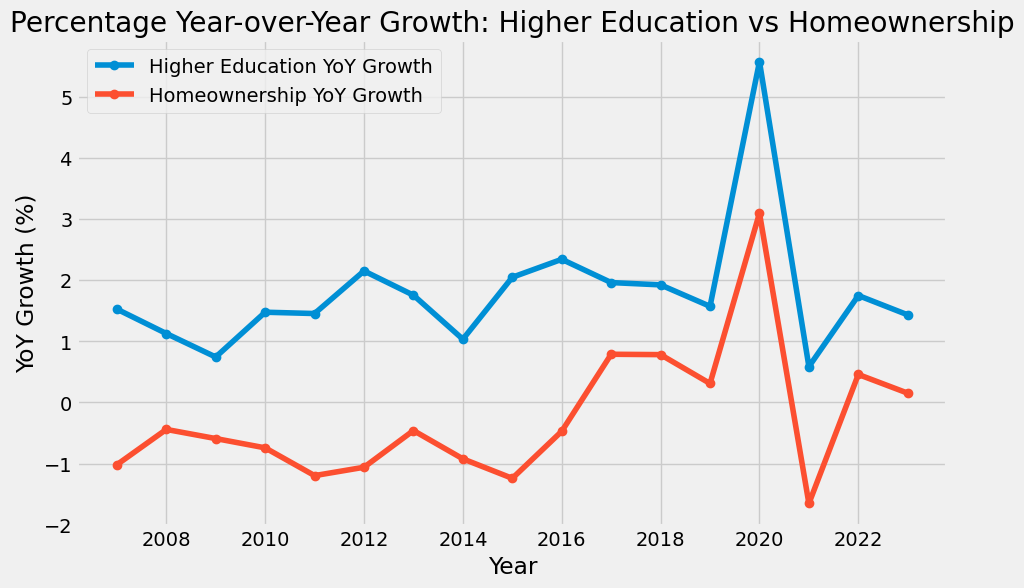

In [414]:
#Percentage Year-over-Year Growth
# Convert Date column to datetime format
Clean_Data_df['Date'] = pd.to_datetime(Clean_Data_df['Date'])

# Extract year from the Date column
Clean_Data_df['Year'] = Clean_Data_df['Date'].dt.year

# Calculate YoY Growth for Higher Education and Homeownership
Clean_Data_df['Higher Edu YoY Growth'] = Clean_Data_df['US Avg. Higher Edu'].pct_change() * 100
Clean_Data_df['Homeownership YoY Growth'] = Clean_Data_df['US Homeownership'].pct_change() * 100

# Plotting the YoY growth for both metrics
plt.figure(figsize=(10, 6))
plt.plot(Clean_Data_df['Year'], Clean_Data_df['Higher Edu YoY Growth'], label='Higher Education YoY Growth', marker='o')
plt.plot(Clean_Data_df['Year'], Clean_Data_df['Homeownership YoY Growth'], label='Homeownership YoY Growth', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.title('Percentage Year-over-Year Growth: Higher Education vs Homeownership')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

figure.savefig('../Images/Percentage_YOY_Growth_Higher_ED_vs_Homeownership.png')

/var/folders/yk/gw9wr71x4q1fdwjcplr_zc7m0000gn/T/ipykernel_26987/1812270173.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(


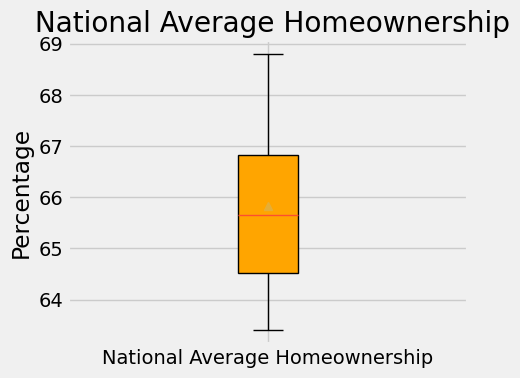

In [415]:

# boxplot
fig, ax = plt.subplots(figsize=(5, 4))
boxplot = ax.boxplot(
    [63.4, 64.525, 65.65, 66.825, 68.8],
    labels=['National Average Homeownership'], 
    patch_artist=True,  # Enables coloring of the boxes
    showmeans=True
)

# Set the color of the boxes to orange
for box in boxplot['boxes']:
    box.set(facecolor='orange')

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title(' National Average Homeownership')

# Show the plot
plt.tight_layout()
plt.show()


figure.savefig('../Images/National_Avg_Homeownership.png')

/var/folders/yk/gw9wr71x4q1fdwjcplr_zc7m0000gn/T/ipykernel_26987/1393675400.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(


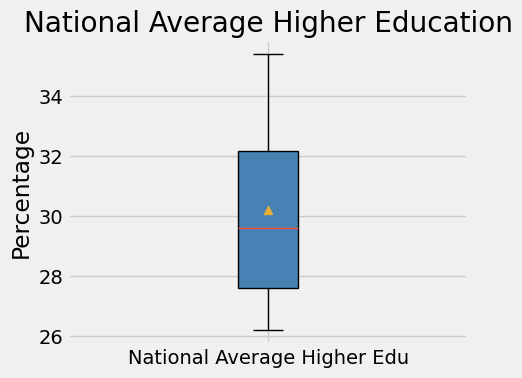

In [416]:

# boxplot
fig, ax = plt.subplots(figsize=(5, 4))
boxplot = ax.boxplot(
    [26.2, 27.6, 29.6, 32.175, 35.4],
    labels=['National Average Higher Edu'], 
    patch_artist=True,  # Enables coloring of the boxes
    showmeans=True
)

# Set the color of the boxes 
for box in boxplot['boxes']:
    box.set(facecolor='steelBlue')

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title('National Average Higher Education')

# Show the plot
plt.tight_layout()
plt.show()


figure.savefig('../Images/Nataional_Avg_Higher_ED.png')

In [417]:
# Full regions mapping with all states
regions = {
    'South': ['Alabama', 'Georgia', 'Florida', 'Texas', 'Louisiana', 'South Carolina', 'North Carolina', 'Tennessee', 'Kentucky', 'Mississippi'],
    'North': ['New York', 'Illinois', 'Pennsylvania', 'Michigan', 'Ohio', 'Indiana', 'Wisconsin', 'Minnesota', 'Iowa', 'Nebraska'],
    'West': ['California', 'Washington', 'Oregon', 'Colorado', 'Arizona', 'Utah', 'Nevada', 'Idaho', 'Montana', 'Wyoming'],
    'Midwest': ['Missouri', 'North Dakota', 'South Dakota', 'Kansas', 'Maine', 'Vermont', 'Rhode Island', 'Connecticut', 'Delaware', 'Maryland'],
    'Northeast': ['New Jersey', 'Massachusetts', 'New Hampshire', 'Maine', 'Connecticut'],
    'Pacific': ['Hawaii', 'Alaska']
}

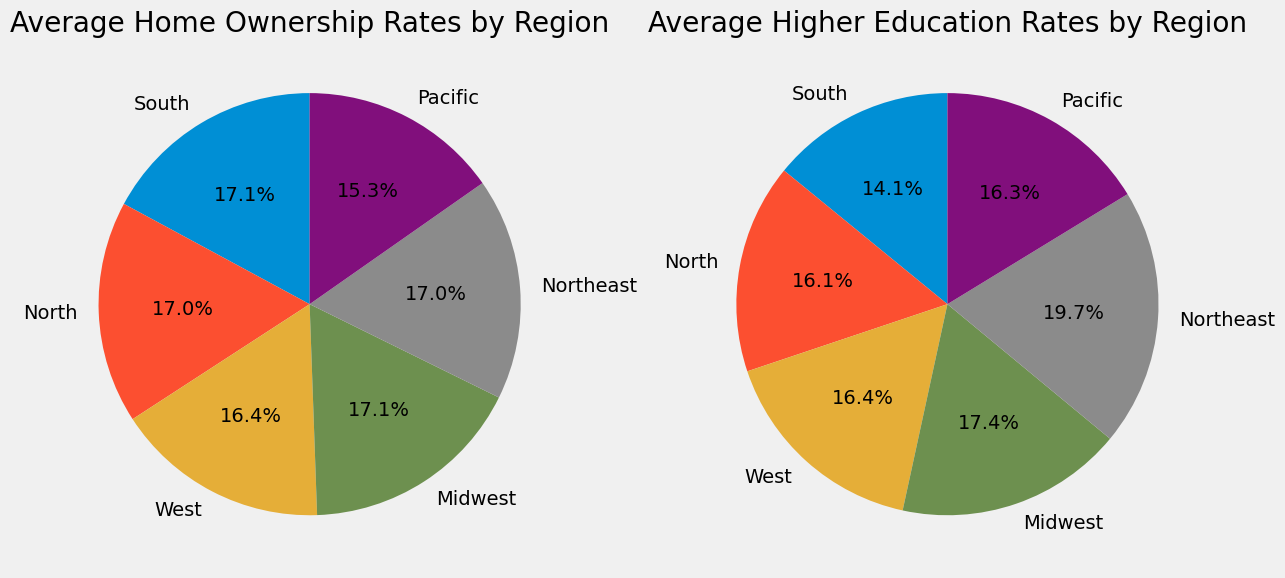

In [418]:
# Calculate the average home ownership and higher education rates by region
region_avg_homeownership = {}
region_avg_highered = {}

for region, states in regions.items():
    # Exclude any state that doesn't exist in the dataset (e.g., some may not be present in the original data)
    valid_states = [state for state in states if state in HomeOwnerShip_Data_df.columns and state in Higher_Edu_Data_df.columns]
    
    if valid_states:  # Only proceed if there are valid states in both dataframes
        region_avg_homeownership[region] = HomeOwnerShip_Data_df[valid_states].mean(axis=1).mean()
        region_avg_highered[region] = Higher_Edu_Data_df[valid_states].mean(axis=1).mean()

# Plotting the pie charts for regional comparison
plt.figure(figsize=(13, 6))

# Home Ownership pie chart
plt.subplot(1, 2, 1)
plt.pie(region_avg_homeownership.values(), labels=region_avg_homeownership.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Average Home Ownership Rates by Region')

# Higher Education pie chart
plt.subplot(1, 2, 2)
plt.pie(region_avg_highered.values(), labels=region_avg_highered.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Average Higher Education Rates by Region')

# Show the pie charts
plt.tight_layout()
plt.show()

figure.savefig('../Images/Avg_Homeownership_vs_Higher_ED_By_Region.png')
